In [1]:
import pandas as pd

In [68]:
df = pd.read_csv("04-anki-reviews.csv")
df["date"] = (
    pd.to_datetime(df["id"], unit="ms")
    .dt.tz_localize("UTC")
    .dt.tz_convert("Europe/Oslo")
)
df["hour"] = df["date"].dt.hour
df["time"] = pd.to_timedelta(df["time"], unit="ms")
df["ivl"] = df["ivl"].apply(
    lambda x: pd.to_timedelta(x, unit="D") if x > 0 else pd.to_timedelta(-x, unit="s")
)
df["lastIvl"] = df["lastIvl"].apply(
    lambda x: pd.to_timedelta(x, unit="D") if x > 0 else pd.to_timedelta(-x, unit="s")
)
df["efficiency"] = df["ease"] / df["time"].dt.total_seconds()

cards = df.drop_duplicates(subset="cid", keep="last")

df

,id,cid,usn,ease,ivl,lastIvl,factor,time,type,date,hour,efficiency
0,1645550962771,1645550870303,0,3,0 days 00:10:00,0 days 00:01:00,0,0 days 00:00:15.705000,0,2022-02-22 18:29:22.771000+01:00,18,0.191022
1,1645550969526,1645550878622,0,3,0 days 00:10:00,0 days 00:01:00,0,0 days 00:00:06.753000,0,2022-02-22 18:29:29.526000+01:00,18,0.444247
2,1645550970913,1645550884416,0,3,0 days 00:10:00,0 days 00:01:00,0,0 days 00:00:01.385000,0,2022-02-22 18:29:30.913000+01:00,18,2.166065
3,1645550972018,1645550888136,0,3,0 days 00:10:00,0 days 00:01:00,0,0 days 00:00:01.102000,0,2022-02-22 18:29:32.018000+01:00,18,2.722323
4,1645550977062,1645550878622,0,3,1 days 00:00:00,0 days 00:10:00,2500,0 days 00:00:05.042000,0,2022-02-22 18:29:37.062000+01:00,18,0.595002
...,...,...,...,...,...,...,...,...,...,...,...,...
17036,1738911261637,1734801994355,189,3,1 days 00:00:00,0 days 00:10:00,2500,0 days 00:00:01.634000,0,2025-02-07 07:54:21.637000+01:00,7,1.835985
17037,1738911265074,1734801968577,189,3,1 days 00:00:00,0 days 00:10:00,2500,0 days 00:00:03.327000,0,2025-02-07 07:54:25.074000+01:00,7,0.901713
17038,1738911268197,1734801993382,189,3,1 days 00:00:00,0 days 00:10:00,2500,0 days 00:00:03.011000,0,2025-02-07 07:54:28.197000+01:00,7,0.996347
17039,1738911271684,1734801992150,189,3,1 days 00:00:00,0 days 00:10:00,2500,0 days 00:00:03.378000,0,2025-02-07 07:54:31.684000+01:00,7,0.888099


Text(0.5, 1.0, 'Review distribution over time')

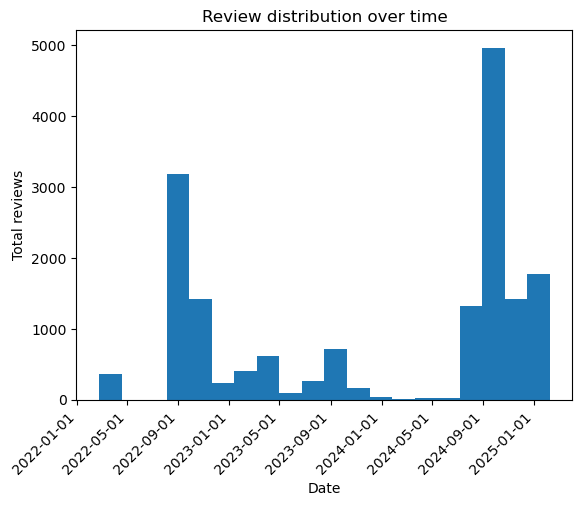

In [67]:
ax = df["date"].hist(grid=False, bins=20)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Date")
ax.set_ylabel("Total reviews")
ax.set_title("Review distribution over time")

Text(0.5, 1.0, 'Card type distribution')

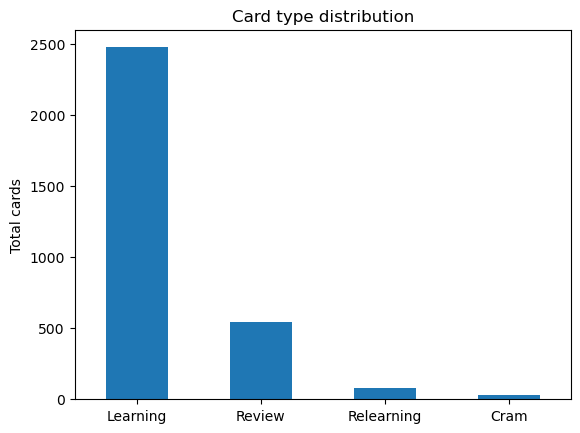

In [38]:
ax = cards["type"].value_counts().plot(kind="bar")
ax.set_xticklabels(["Learning", "Review", "Relearning", "Cram"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Total cards")
ax.set_title("Card type distribution")

[Text(0, 0, 'Again'),
 Text(1, 0, 'Hard'),
 Text(2, 0, 'Good'),
 Text(3, 0, 'Easy')]

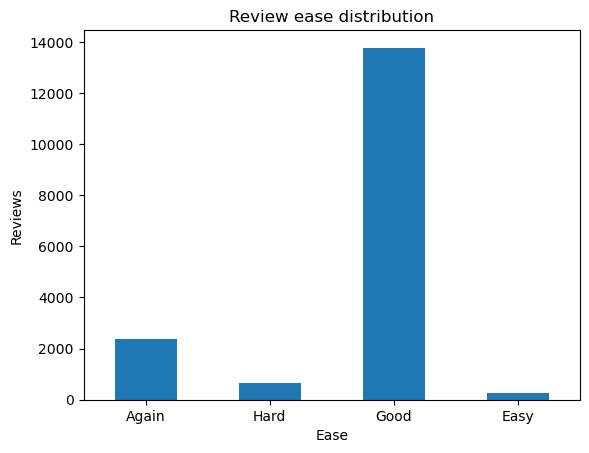

In [36]:
ax = df["ease"].value_counts().sort_index().plot(kind="bar", xlabel="")
ax.set_title("Review ease distribution")
ax.set_xlabel("Ease")
ax.set_ylabel("Reviews")
ax.set_xticklabels(["Again", "Hard", "Good", "Easy"], rotation=0)

Text(0.5, 1.0, 'Time spent per review in seconds')

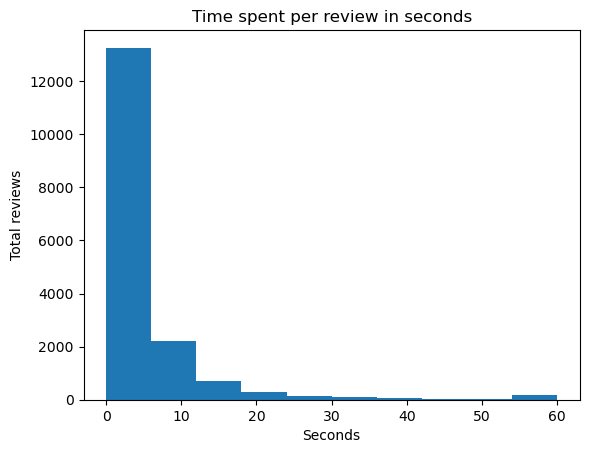

In [45]:
ax = df["time"].dt.total_seconds().hist(grid=False)
ax.set_xlabel("Seconds")
ax.set_ylabel("Total reviews")
ax.set_title("Time spent per review in seconds")

Text(0.5, 1.0, 'Card interval distribution')

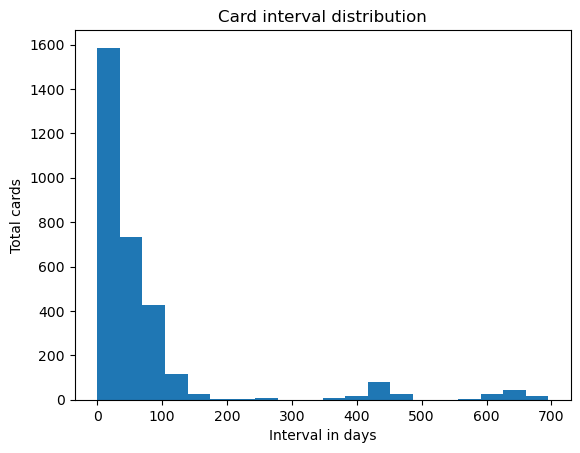

In [65]:
ax = cards["ivl"].dt.days.hist(grid=False, bins=20)
ax.set_xlabel("Interval in days")
ax.set_ylabel("Total cards")
ax.set_title("Card interval distribution")

Text(0.5, 1.0, 'Reviews by weekday')

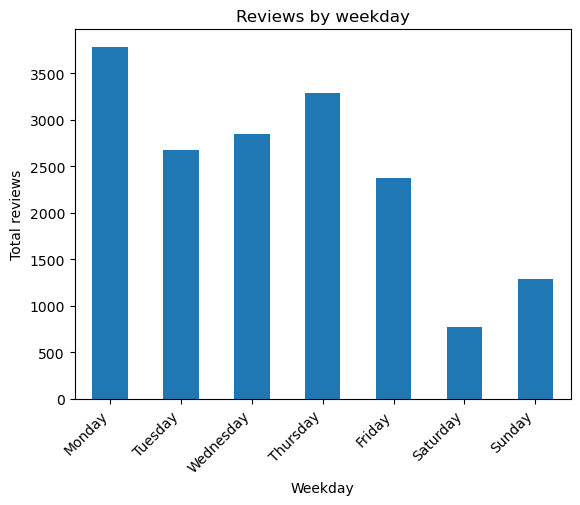

In [71]:
ax = df["date"].dt.weekday.value_counts().sort_index().plot(kind="bar")
ax.set_xticklabels(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    rotation=45,
    ha="right",
)
ax.set_xlabel("Weekday")
ax.set_ylabel("Total reviews")
ax.set_title("Reviews by weekday")

Text(0.5, 1.0, 'Reviews by time of day')

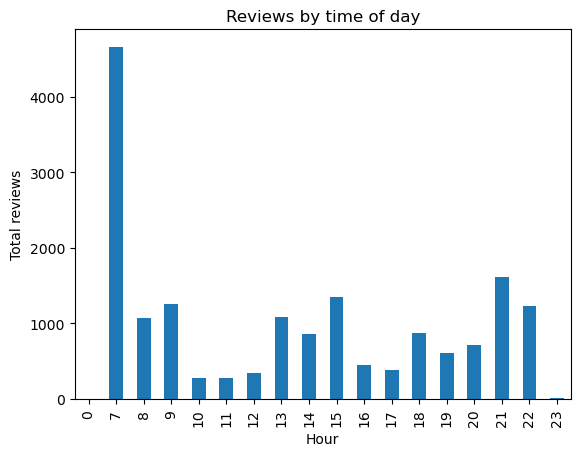

In [64]:
ax = df["hour"].value_counts().sort_index().plot(kind="bar", xlabel="")
ax.set_xlabel("Hour")
ax.set_ylabel("Total reviews")
ax.set_title("Reviews by time of day")

Text(0, 0.5, 'Average efficiency (ease / time)')

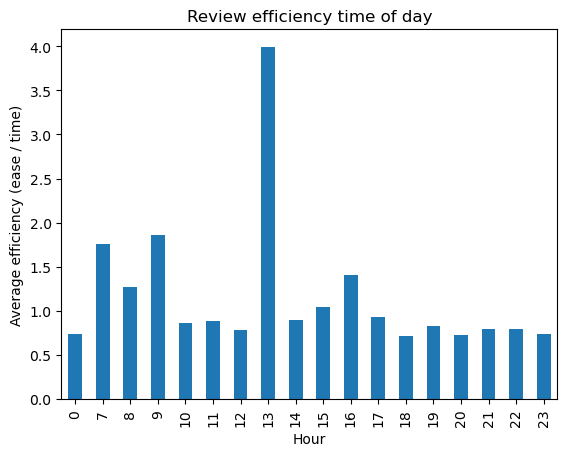

In [70]:
ax = df.ghroupby("hour")["efficiency"].mean().plot(kind="bar")
ax.set_title("Review efficiency time of day")
ax.set_xlabel("Hour")
ax.set_ylabel("Average efficiency (ease / time)")